In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
logs = pd.read_csv('/PYTHON_Project/Data_analysis_project_one/Lessen_1/3_logs.csv', encoding='Windows-1251')

In [21]:
user_data = pd.read_csv('/PYTHON_Project/Data_analysis_project_one/Lessen_1/3_user_data.csv', encoding='Windows-1251')

In [30]:
#Проверьте размер таблицы, типы применения, наличие пропущенных результатов, описательную статистику

user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [31]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [32]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [33]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [61]:
# Какой клиент осуществит больший объем операционной деятельности? (success == True)

logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [62]:
succes_counts = logs.loc[logs.success == True].client.value_counts()

In [63]:
max_num = succes_counts.max()

In [64]:
max_success_users = succes_counts.loc[succes_counts == max_num]

In [65]:
max_success_users

client
28719    41
52870    41
61468    41
61473    41
12179    41
82563    41
36165    41
92584    41
78349    41
Name: count, dtype: int64

In [66]:
max_success_users.index.sort_values()

Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

In [67]:
# С какой платформы осуществляется наибольшее количество успешных операций?

success_rate_max = logs.loc[logs.success == True].platform.value_counts().idxmax()

In [68]:
success_rate_max

'phone'

In [70]:
# Какую платформу предпочитают премиумные клиенты? 


user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [71]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [73]:
premium_logs = logs.merge(user_data, on='client')

In [76]:
premium_logs.loc[premium_logs.premium == True].platform.value_counts().idxmax()


'phone'

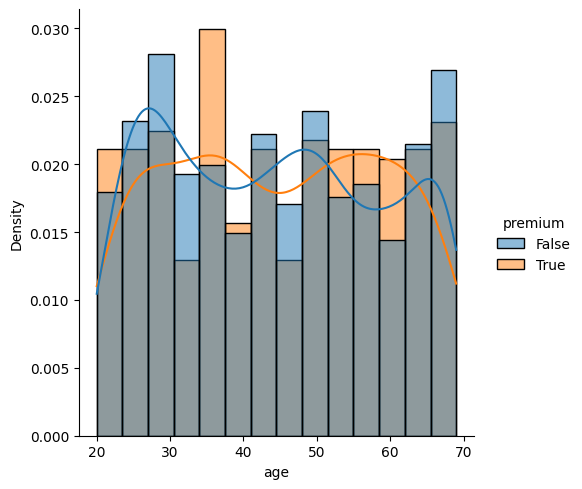

In [78]:
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)


sns.displot(data=premium_logs, x='age', hue='premium', kde=True, kind='hist', stat='density',
            common_norm=False, bins=14)

In [79]:
#  Постройте график распределения числа успешных операций


succes_count = logs.loc[logs.success == True].client.value_counts()

In [80]:
succes_count = succes_count.rename("successes")

<Axes: xlabel='successes', ylabel='count'>

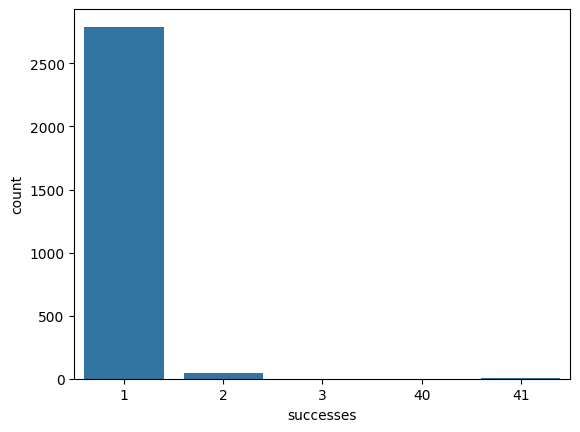

In [81]:
sns.countplot(x=succes_count)

<Axes: xlabel='age', ylabel='count'>

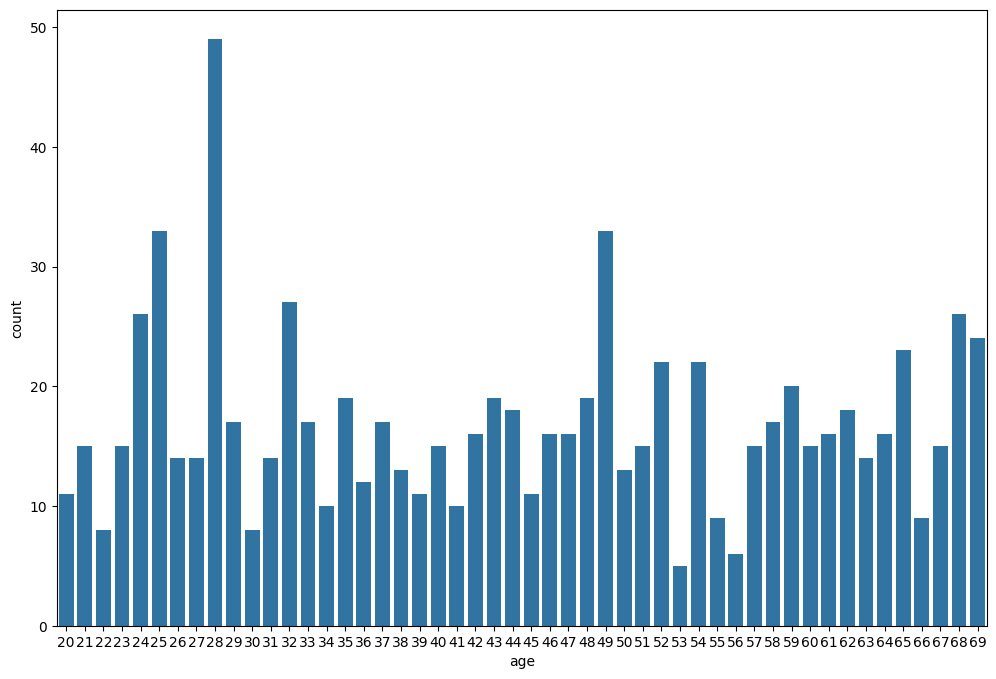

In [84]:
# Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, 
# используя sns.countplot (x – возраст, y – число успешных операций). 
# Клиенты какого возраста совершили наибольшее количество успешных действий?


plt.figure(figsize=(12, 8))
sns.countplot(data=premium_logs.loc[(premium_logs.platform == 'computer') & (premium_logs.success == True)], x='age')
                                  